In [59]:
%matplotlib inline
from nfl import date as nfl_date
from nfl import storage as nfl_db
from nfl.fdb import features as nfl_feat
from nfl.fdb import training as nfl_train
from nfl.fo import const as fo_const
from nfl.fo import storage as fo_db
from nfl.unified import const as unif_const

In [33]:
team_dvoa = fo_db.get_team_dvoa()
team_dvoa.head()

[Mongo] On extraction of document #10000


Def Pass DVOA  Def Rush DVOA  Defense DVOA  \
Year Week Team Opponent                                               
1989 1    ATL  LARM               18.3           24.1          21.8   
     2    ATL  DAL                94.4           10.1          41.8   
     3    ATL  IND               -26.9           -5.6         -12.9   
     4    ATL  GB                 19.6           -1.8           7.8   
     5    ATL  LARM               33.8           25.5          29.3   

                         Off Pass DVOA  Off Rush DVOA  Offense DVOA  ST DVOA  \
Year Week Team Opponent                                                        
1989 1    ATL  LARM               34.2          -26.3          12.2     -5.9   
     2    ATL  DAL                26.3           11.0          18.7     -1.2   
     3    ATL  IND               -73.3            9.5         -38.6      0.7   
     4    ATL  GB                 38.1          -18.3           1.7     11.9   
     5    ATL  LARM               46.2          -30.8          20.7    -16.5   

                         Total DVOA  
Year Week Team Opponent              
1989 1    ATL  LARM           -15.6  
     2    ATL  DAL            -24.3  
     3    ATL  IND            -24.9  
     4    ATL  GB               5.8  
     5    ATL  LARM           -25.1

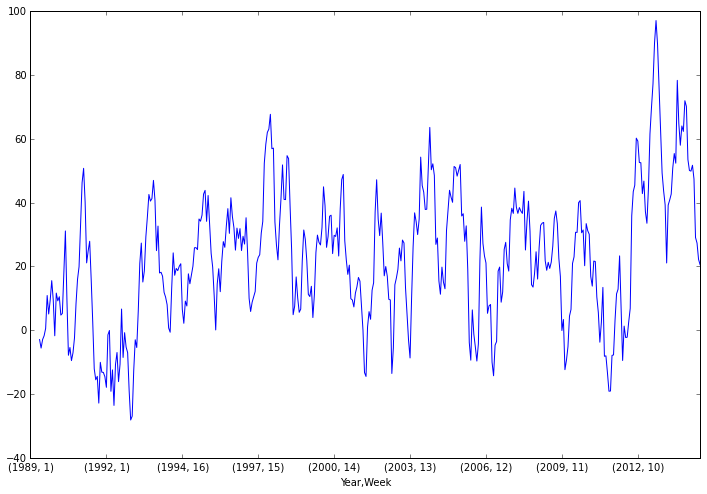

In [55]:
idx_cols = team_dvoa.index.names
x = team_dvoa.reset_index().query('Team == "DEN"')\
    .set_index(['Year', 'Week'])['Off Pass DVOA']
pd.rolling_mean(x, 7).plot(figsize=(12,8))

In [26]:
team_dvoa.query('Year == 2014 & Week == 16 & (Team == "SEA" | Opponent == "SEA")')

,Def Pass DVOA,Def Rush DVOA,Defense DVOA,Off Pass DVOA,Off Rush DVOA,Offense DVOA,Opponent,ST DVOA,Team,Total DVOA,Week,Year
13619,-22.0%,-42.4%,-28.2%,79.6%,51.4%,52.7%,ARI,-14.7%,SEA,66.2%,16,2014
13687,78.6%,5.7%,38.0%,-22.8%,-44.7%,-33.7%,SEA,0.2%,ARI,-71.5%,16,2014


In [27]:
team_dvoa.query('Year == 2014 & Team == "SEA"').drop(['Team', 'Opponent'])

,Def Pass DVOA,Def Rush DVOA,Defense DVOA,Off Pass DVOA,Off Rush DVOA,Offense DVOA,Opponent,ST DVOA,Team,Total DVOA,Week,Year
13604,-40.2%,-15.6%,-30.7%,36.1%,57.8%,48.5%,GB,-0.5%,SEA,78.7%,1,2014
13605,41.1%,-12.6%,16.1%,39.3%,36.8%,25.9%,SD,-5.2%,SEA,4.6%,2,2014
13606,-9.7%,-86.6%,-32.8%,32.2%,21.9%,21.4%,DEN,-1.0%,SEA,53.2%,3,2014
13607,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,BYE,0.0%,SEA,0.0%,4,2014
13608,43.0%,-77.3%,0.1%,-4.5%,48.2%,5.6%,WAS,12.4%,SEA,17.8%,5,2014
13609,21.0%,-17.1%,0.5%,-67.9%,-1.6%,-52.6%,DAL,14.7%,SEA,-38.5%,6,2014
13610,82.3%,-23.8%,25.0%,58.2%,34.1%,38.2%,STL,-31.7%,SEA,-18.5%,7,2014
13611,-49.0%,-9.2%,-24.5%,-14.2%,11.7%,-5.5%,CAR,7.6%,SEA,26.6%,8,2014
13612,-34.7%,-39.9%,-36.2%,-5.1%,30.8%,7.8%,OAK,-24.8%,SEA,19.2%,9,2014
13613,9.7%,-7.7%,4.6%,-13.6%,59.8%,33.8%,NYG,1.9%,SEA,31.1%,10,2014


In [20]:
dates = nfl_date.get_reg_season_weeks().rename(columns={'WeekNumber': 'Week'})
dates.head()

[Mongo] On extraction of document #10000


,Year,Date,Week
0,1995,1995-09-03,1
1,1995,1995-09-10,2
2,1995,1995-09-17,3
3,1995,1995-09-24,4
4,1995,1995-10-01,5


In [21]:
team_map = nfl_db.get_data(unif_const.DB, unif_const.COLL_TEAM)
team_map.head()

,FDB_ID,FO_ID,TeamName
0,miami-dolphins,MIA,Miami Dolphins
1,new-england-patriots,NE,New England Patriots
2,new-york-jets,NYJ,New York Jets
3,baltimore-ravens,BAL,Baltimore Ravens
4,cincinnati-bengals,CIN,Cincinnati Bengals


In [85]:
team_map.set_index('FO_ID').head()

,FDB_ID,TeamName
FO_ID,,
MIA,miami-dolphins,Miami Dolphins
NE,new-england-patriots,New England Patriots
NYJ,new-york-jets,New York Jets
BAL,baltimore-ravens,Baltimore Ravens
CIN,cincinnati-bengals,Cincinnati Bengals


In [133]:
fo_teams = team_map.set_index('FO_ID')
def get_fo_id(team):
    if team == 'BYE':
        return np.nan
    res = fo_teams.loc[team]['FDB_ID'] if team in fo_teams.index else np.nan
    return res.iloc[0] if isinstance(res, pd.Series) else res
data = team_dvoa.reset_index().copy()

# Resolve team id
data['TeamId'] = data['Team'].apply(get_fo_id)
assert data['TeamId'].isnull().sum() == 0

# Resolve opposing team id
data['OpponentTeamId'] = data['Opponent'].apply(get_fo_id)
# Some opponents are set as "BYE" and these records can be safely ignored
data = data[~data['OpponentTeamId'].isnull()]

# Merge dvoa numbers with date <-> week number mapping and verify that
# no dates have missing statistics
data = pd.merge(dates, data, on=['Year', 'Week'], how='left')
assert data['TeamId'].isnull().sum() == 0

data = data.drop(['Team', 'Opponent'], axis=1)#.set_index(['Year', 'Date', 'TeamId', 'OpponentTeamId'])

In [134]:
data.head()

,Year,Date,Week,Def Pass DVOA,Def Rush DVOA,Defense DVOA,Off Pass DVOA,Off Rush DVOA,Offense DVOA,ST DVOA,Total DVOA,TeamId,OpponentTeamId
0,1995,1995-09-03,1,27.2,-41.6,7.3,18.5,-13.4,4.3,3.2,0.3,atlanta-falcons,carolina-panthers
1,1995,1995-09-03,1,-20.0,-23.2,-21.5,-15.3,-51.3,-40.6,-10.9,-30.0,buffalo-bills,denver-broncos
2,1995,1995-09-03,1,-5.6,13.8,2.9,91.2,51.6,66.1,-6.9,56.3,chicago-bears,minnesota-vikings
3,1995,1995-09-03,1,-45.0,-6.8,-28.9,24.3,-0.9,9.8,4.6,43.3,cincinnati-bengals,indianapolis-colts
4,1995,1995-09-03,1,40.0,1.7,24.3,32.2,-14.6,11.0,3.3,-10.0,cleveland-browns,new-england-patriots


In [152]:
def get_aggregate_stats(x):
    dvoa_cols = [c for c in x if c.endswith('DVOA')]
    res = []
    for i, r in x.iterrows():
        d = x[x['Date'] < r['Date']]
        if len(d) == 0:
            continue
        d = d[dvoa_cols].apply(np.mean).to_dict()
        d['Date'] = r['Date']
        d['Week'] = r['Week']
        d['OpponentTeamId'] = r['OpponentTeamId']
        res.append(d)
    return pd.DataFrame(res)
data_agg = data.groupby(['Year', 'TeamId']).apply(get_aggregate_stats)
data_agg = data_agg.reset_index().drop('level_2', axis=1)

In [156]:
data_agg.head()

,Year,TeamId,Date,Def Pass DVOA,Def Rush DVOA,Defense DVOA,Off Pass DVOA,Off Rush DVOA,Offense DVOA,OpponentTeamId,ST DVOA,Total DVOA,Week
0,1995,arizona-cardinals,1995-09-10,24.500,26.300,25.500000,-102.000000,-15.90,-60.200000,philadelphia-eagles,-4.400000,-90.200000,2
1,1995,arizona-cardinals,1995-09-17,42.500,26.800,32.550000,-32.900000,-27.10,-33.250000,detroit-lions,2.650000,-63.250000,3
2,1995,arizona-cardinals,1995-09-24,31.500,12.200,20.666667,-33.933333,-21.60,-32.633333,dallas-cowboys,3.833333,-49.566667,4
3,1995,arizona-cardinals,1995-10-01,33.425,13.175,22.200000,-16.025000,-24.00,-25.275000,kansas-city-chiefs,2.025000,-45.525000,5
4,1995,arizona-cardinals,1995-10-08,15.200,12.900,15.400000,-15.380000,-29.38,-27.100000,new-york-giants,1.580000,-40.960000,6


In [158]:
#data_agg.loc[(2014, 'denver-broncos')].set_index('Date')['Offense DVOA'].plot()

# Save Results

In [159]:
import imp
imp.reload(fo_const)
imp.reload(fo_db)

<module 'nfl.fo.storage' from '/Users/eczech/repos/portfolio/functional/sports/python/nfl/fo/storage.py'>

In [157]:
nfl_db.insert_data(fo_const.DB, fo_const.COLL_DERIVED_DVOA, data_agg, ['Year', 'Date', 'TeamId', 'OpponentTeamId'])

# Get Results

In [200]:
imp.reload(fo_db)
imp.reload(nfl_feat)
imp.reload(nfl_db)

<module 'nfl.storage' from '/Users/eczech/repos/portfolio/functional/sports/python/nfl/storage.py'>

In [202]:
dvoa_data = fo_db.get_derived_game_dvoa(None)
dvoa_data.head()

[Mongo] On extraction of document #10000
[Mongo] On extraction of document #20000


Def Pass DVOA  \
Year Date       TeamId            OpponentTeamId                       
1995 1995-09-10 arizona-cardinals philadelphia-eagles         24.500   
     1995-09-17 arizona-cardinals detroit-lions               42.500   
     1995-09-24 arizona-cardinals dallas-cowboys              31.500   
     1995-10-01 arizona-cardinals kansas-city-chiefs          33.425   
     1995-10-08 arizona-cardinals new-york-giants             15.200   

                                                       Def Rush DVOA  \
Year Date       TeamId            OpponentTeamId                       
1995 1995-09-10 arizona-cardinals philadelphia-eagles         26.300   
     1995-09-17 arizona-cardinals detroit-lions               26.800   
     1995-09-24 arizona-cardinals dallas-cowboys              12.200   
     1995-10-01 arizona-cardinals kansas-city-chiefs          13.175   
     1995-10-08 arizona-cardinals new-york-giants             12.900   

                                                       Defense DVOA  \
Year Date       TeamId            OpponentTeamId                      
1995 1995-09-10 arizona-cardinals philadelphia-eagles     25.500000   
     1995-09-17 arizona-cardinals detroit-lions           32.550000   
     1995-09-24 arizona-cardinals dallas-cowboys          20.666667   
     1995-10-01 arizona-cardinals kansas-city-chiefs      22.200000   
     1995-10-08 arizona-cardinals new-york-giants         15.400000   

                                                       Off Pass DVOA  \
Year Date       TeamId            OpponentTeamId                       
1995 1995-09-10 arizona-cardinals philadelphia-eagles    -102.000000   
     1995-09-17 arizona-cardinals detroit-lions           -32.900000   
     1995-09-24 arizona-cardinals dallas-cowboys          -33.933333   
     1995-10-01 arizona-cardinals kansas-city-chiefs      -16.025000   
     1995-10-08 arizona-cardinals new-york-giants         -15.380000   

                                                       Off Rush DVOA  \
Year Date       TeamId            OpponentTeamId                       
1995 1995-09-10 arizona-cardinals philadelphia-eagles         -15.90   
     1995-09-17 arizona-cardinals detroit-lions               -27.10   
     1995-09-24 arizona-cardinals dallas-cowboys              -21.60   
     1995-10-01 arizona-cardinals kansas-city-chiefs          -24.00   
     1995-10-08 arizona-cardinals new-york-giants             -29.38   

                                                       Offense DVOA   ST DVOA  \
Year Date       TeamId            OpponentTeamId                                
1995 1995-09-10 arizona-cardinals philadelphia-eagles    -60.200000 -4.400000   
     1995-09-17 arizona-cardinals detroit-lions          -33.250000  2.650000   
     1995-09-24 arizona-cardinals dallas-cowboys         -32.633333  3.833333   
     1995-10-01 arizona-cardinals kansas-city-chiefs     -25.275000  2.025000   
     1995-10-08 arizona-cardinals new-york-giants        -27.100000  1.580000   

                                                       Total DVOA  
Year Date       TeamId            OpponentTeamId                   
1995 1995-09-10 arizona-cardinals philadelphia-eagles  -90.200000  
     1995-09-17 arizona-cardinals detroit-lions        -63.250000  
     1995-09-24 arizona-cardinals dallas-cowboys       -49.566667  
     1995-10-01 arizona-cardinals kansas-city-chiefs   -45.525000  
     1995-10-08 arizona-cardinals new-york-giants      -40.960000

In [166]:
dt = dvoa_data.loc[(1995, pd.to_datetime('1995-09-10'), 'arizona-cardinals', 'philadelphia-eagles')]
dt = dt.to_dict()
dt = pd.DataFrame(dt, index=pd.MultiIndex.from_tuples([('Past', 'arizona-cardinals')], names=['TimeFrame', 'TeamId']))
dt.columns = [('All', c) for c in dt]
dt

,,"(All, Def Pass DVOA)","(All, Def Rush DVOA)","(All, Defense DVOA)","(All, Off Pass DVOA)","(All, Off Rush DVOA)","(All, Offense DVOA)","(All, ST DVOA)","(All, Total DVOA)"
TimeFrame,TeamId,,,,,,,,
Past,arizona-cardinals,24.5,26.3,25.5,-102,-15.9,-60.2,-4.4,-90.2


In [60]:
year = 2012
rosters =nfl_feat.get_rosters(year)
games = nfl_feat.get_games(year, remove_mirrored_records=False, query={'GameType': 'Regular Season'})
player_stats = nfl_feat.get_player_stats(games, year)
#vals = nfl_feat.get_matchup_matrix(game, *vals, aggregator=sos_agg

[Mongo] On extraction of document #10000
[Mongo] On extraction of document #20000
[Mongo] On extraction of document #30000
[Mongo] On extraction of document #10000


In [215]:
imp.reload(nfl_feat)
from nfl.sos import storage as sos_db

def get_game_team_dvoa_stats(dvoa_data, game, team_selector):
    key = (game['Year'], game['Date'], team_selector[0], team_selector[1])
    if key not in dvoa_data.index:
        print('Failed to find DVOA data for game {}'.format(game))
        return pd.DataFrame()
    stats = dvoa_data.loc[key].to_dict()
    idx = pd.MultiIndex.from_tuples([('Past', team_selector[0])], names=['TimeFrame', 'TeamId'])
    stats = pd.DataFrame(stats, index=idx)
    stats.columns = [('All', c) for c in stats]
    return stats

def get_game_dvoa_stats(dvoa_data, game):
    d1 = get_game_team_dvoa_stats(dvoa_data, game, (game['TeamId'], game['OpponentTeamId']))
    d2 = get_game_team_dvoa_stats(dvoa_data, game, (game['OpponentTeamId'], game['TeamId']))
    return d1.append(d2)

def get_aggregator(year):
    dvoa_data = fo_db.get_derived_game_dvoa([year])
    sos_fetcher, damping_factors = sos_db.get_sos_fetcher([year])

    def sos_aggregator(game, game_player_stats, agg_type):
        # Sum by position and game
        res = game_player_stats.groupby([
                'TimeFrame', 'TeamId', 'OpponentTeamId', 'OutcomeLink',
                'Year', 'Date', 'Pos', 'Metric'])['Value'].sum()
        res.name = 'Value'

        def sos_averages(x):
            n_games = len(x['OutcomeLink'].unique())
            sos_type = nfl_train.get_sos_type(x['Pos'].iloc[0])

            if sos_type is not None and agg_type == nfl_feat.AGG_TYPE_PLAYER_FIRST:

                def get_sos_ranks(opp_team):
                    rx = sos_fetcher(sos_type, game['Year'], game['Date'], opp_team)
                    return rx
                x['Ranks'] = [get_sos_ranks(t) for t in x['OpponentTeamId']]

                def get_sos_values(g):
                    mv = {'n': n_games, 'v': g['Value'].sum() / n_games, 'a': {}}
                    for d in damping_factors:
                        dv = np.dot(g['Ranks'].apply(lambda rk: rk[d]), g['Value']) / n_games
                        mv['a'][d] = dv
                    return mv
                return x.groupby(['Pos', 'Metric']).apply(get_sos_values)
            else:
                return x.groupby(['Pos', 'Metric'])['Value'].sum() / n_games

        res = res.reset_index().groupby(['TimeFrame', 'TeamId']).apply(sos_averages)


        # Unstacking is only necessary when there was more than 1 group above
        if not isinstance(res, pd.DataFrame):
            res = res.unstack(level=[-2, -1])

        # Add DVOA statistics, if applicable
        if agg_type == nfl_feat.AGG_TYPE_TEAM_FIRST:
            res = pd.concat([res, get_game_dvoa_stats(dvoa_data, game)], axis=1)

        #if agg_type == nfl_feat.AGG_TYPE_PLAYER_FIRST and 'Michael Vick' in game_player_stats['Player'].unique():
            #print(res)

        return res
    return sos_aggregator

In [216]:
aggregator = get_aggregator(year)
game_link = '/games/boxscore.html?gid=2012112510'
game = games[games['OutcomeLink'] == game_link].iloc[0]
print(game)
vals = nfl_feat.get_game_context(game, games, player_stats, rosters, year, aggregator=aggregator)
gm = nfl_feat.get_matchup_matrix(game, *vals, aggregator=aggregator)

Attend                                                  60,062
Date                                       2012-11-25 00:00:00
GameType                                        Regular Season
Location          University of Phoenix Stadium (Glendale, AZ)
Opponent                                             St. Louis
OpponentLink             /teams/nfl/st-louis-rams/results/2012
OutcomeLink                /games/boxscore.html?gid=2012112510
Result                                                 L 31-17
TeamId                                       arizona-cardinals
Year                                                      2012
GameNumber                                                  11
OpponentTeamId                                   st-louis-rams
Name: 10, dtype: object


In [217]:
[c for c in gm.columns if 'DVOA' in c[1]]

[('Stat:Opp', 'All:Def Pass DVOA:1st'),
 ('Stat:Opp', 'All:Def Rush DVOA:1st'),
 ('Stat:Opp', 'All:Defense DVOA:1st'),
 ('Stat:Opp', 'All:Off Pass DVOA:1st'),
 ('Stat:Opp', 'All:Off Rush DVOA:1st'),
 ('Stat:Opp', 'All:Offense DVOA:1st'),
 ('Stat:Opp', 'All:ST DVOA:1st'),
 ('Stat:Opp', 'All:Total DVOA:1st'),
 ('Stat:Team', 'All:Def Pass DVOA:1st'),
 ('Stat:Team', 'All:Def Rush DVOA:1st'),
 ('Stat:Team', 'All:Defense DVOA:1st'),
 ('Stat:Team', 'All:Off Pass DVOA:1st'),
 ('Stat:Team', 'All:Off Rush DVOA:1st'),
 ('Stat:Team', 'All:Offense DVOA:1st'),
 ('Stat:Team', 'All:ST DVOA:1st'),
 ('Stat:Team', 'All:Total DVOA:1st')]

In [218]:
gm.shape

(126, 1728)

In [69]:
vals[0].head()

(DB, defense:Ast:1st)  (DB, defense:Avg:1st)  \
TimeFrame TeamId                                                            
Current   arizona-cardinals                    5.0                    0.0   
          st-louis-rams                        3.0                   75.5   
Past      arizona-cardinals                    3.2                    6.1   
          st-louis-rams                        4.6                   10.8   

                             (DB, defense:Int:1st)  (DB, defense:Lg:1st)  \
TimeFrame TeamId                                                           
Current   arizona-cardinals                    1.0                   0.0   
          st-louis-rams                        3.0                  77.0   
Past      arizona-cardinals                    1.0                   7.9   
          st-louis-rams                        0.6                  10.8   

                             (DB, defense:Sack:1st)  (DB, defense:Solo:1st)  \
TimeFrame TeamId                                                              
Current   arizona-cardinals                     0.0                    15.0   
          st-louis-rams                         0.0                    24.0   
Past      arizona-cardinals                     0.2                    18.8   
          st-louis-rams                         0.3                    22.6   

                             (DB, defense:TD:1st)  (DB, defense:Tot:1st)  \
TimeFrame TeamId                                                           
Current   arizona-cardinals                   0.0                   20.0   
          st-louis-rams                       2.0                   27.0   
Past      arizona-cardinals                   0.0                   22.0   
          st-louis-rams                       0.1                   27.2   

                             (DB, defense:Yds:1st)  (DB, defense:YdsL:1st)  \
TimeFrame TeamId                                                             
Current   arizona-cardinals                    0.0                     0.0   
          st-louis-rams                      113.0                     0.0   
Past      arizona-cardinals                    7.9                     1.5   
          st-louis-rams                       10.8                     1.3   

                                     ...            (WR, receiving:TD:2nd)  \
TimeFrame TeamId                     ...                                     
Current   arizona-cardinals          ...                               1.0   
          st-louis-rams              ...                               0.0   
Past      arizona-cardinals          ...                               1.0   
          st-louis-rams              ...                               0.9   

                             (WR, receiving:Tar:2nd)  (WR, receiving:YAC:2nd)  \
TimeFrame TeamId                                                                
Current   arizona-cardinals                     13.0                     39.0   
          st-louis-rams                         30.0                     47.0   
Past      arizona-cardinals                     21.9                     57.8   
          st-louis-rams                         18.9                     41.9   

                             (WR, receiving:Yds:2nd)  (WR, rushing:Att:2nd)  \
TimeFrame TeamId                                                              
Current   arizona-cardinals                    153.0                    1.0   
          st-louis-rams                        158.0                    1.0   
Past      arizona-cardinals                    161.3                    0.8   
          st-louis-rams                        142.0                    0.6   

                             (WR, rushing:Avg:2nd)  (WR, rushing:FD:2nd)  \
TimeFrame TeamId                                                           
Current   arizona-cardinals                  1.000                   0.0   
          st-louis-rams                     13.00